In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from nltk.stem.porter import *
stemmer = PorterStemmer()
from functools import reduce
import random
import math

In [2]:
%matplotlib inline

In [3]:
with open('clean_data/allTaggedItems-06Jan2019.json', 'rb') as f:
    tagitem = json.load(f)
with open('clean_data/allTags-06Jan2019.json', 'rb') as f:
    alltags = json.load(f)

# todo: add lsited words too. But need to chop it into smaller files then process it
# memory is not enough to host all 2m listed words..

# todo: add user search and added in time word is looked up
        
    

In [4]:
tag_cnt = {tag_e['name']: int(tag_e['count']) for tag_e in alltags}
print('Number of tags', len(tag_cnt))

Number of tags 23005


Text(0, 0.5, 'Number of tags')

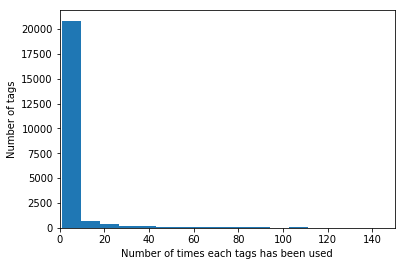

In [5]:
plt.hist(list(tag_cnt.values()), bins=500)
plt.xlim((0, 150))
plt.xlabel('Number of times each tags has been used')
plt.ylabel('Number of tags')

In [6]:
# build dictionaries that we will use later
raw_word_numtags = {}
for i in tagitem:
    word = i['object_id']
    raw_word_numtags[word] = raw_word_numtags.get(word, 0) + 1

In [7]:
print('Number of tagged items (words):',len(raw_word_numtags))

Number of tagged items (words): 124735


Text(0, 0.5, 'Number of words')

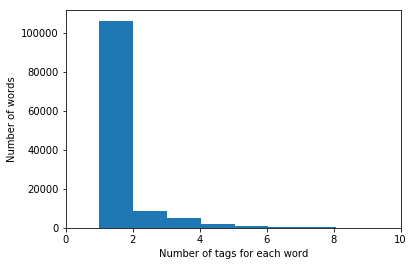

In [8]:
plt.hist(list(raw_word_numtags.values()), bins=200)
plt.xlim((0, 10))
plt.xlabel('Number of tags for each word')
plt.ylabel('Number of words')

A lot of duplicated words with same word but different variations

In [9]:
# TODO: since we are doing stemming, we really should be checking the tag ID before incrementing it
# alternatively we can store the tagIDs in a set, and count the length of the set at the end
word_numtags_map = {}
for i in tagitem:
    # get default word form
    word = stemmer.stem(i['object_id'])
    
    # remove words that are not composed by alphabets
    if len(re.sub('[a-z]+', '', word)) != 0:
        continue
    word_numtags_map[word] = word_numtags_map.get(word, 0) + 1

Number of tagged items: 99302


(0, 10)

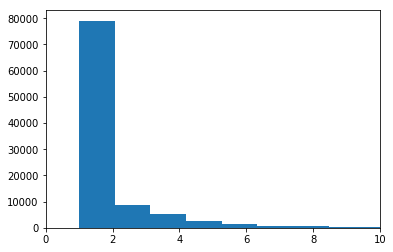

In [10]:
print('Number of tagged items:',len(word_numtags_map))
plt.hist(list(word_numtags_map.values()), bins=200)
plt.xlim((0, 10))

In [11]:
cnts = list(word_numtags_map.values())
greater_than_1_cnts = list(filter(lambda x: x > 1, cnts))
print('Number of words with greater than 1 tags is', len(greater_than_1_cnts), 'which is',len(greater_than_1_cnts)/len(cnts), 'out of', len(cnts), 'total number of stemmed words')

Number of words with greater than 1 tags is 38992 which is 0.3926607721898854 out of 99302 total number of stemmed words


In [12]:
# build reverse mapping
numtags_word_map = {} # basically reverse of st_word_numtags
for w, cnt in word_numtags_map.items():
    numtags_word_map[cnt] = numtags_word_map.get(cnt, []) + [w]


In [13]:
def get_sim_pop_word(word_list, word_numtags_map, numtags_word_map, num_words = 1):
    """
    Return list of words that has same popularity of the input word list
    Args:
    word_list - the list of words user creates
    num_words - the number of suggested words returned by this function
    word_numtags_map - the word to number of tags map
    numtags_word_map - the number of tags to word map
    
    Returns:
    suggested_words - list of words
    """
    word_pop = list(map(lambda w: word_numtags_map.get(w, 0), word_list))
    avg_list_pop = reduce(lambda x, y: x+ y, word_pop)/len(word_list)
    ceil_avg = math.ceil(avg_list_pop) 
    print('average word list popularity', ceil_avg)
    
    # todo: probably can do better than to force it to 1. aka find most similar popularity count
    if ceil_avg not in numtags_word_map.keys():
        ceil_avg = 1 
    # todo: use other mechanims say word2vec, most recent popular word to select words
    suggested_words = random.sample(numtags_word_map[ceil_avg], num_words)
    
    return suggested_words
    

In [14]:
test_t2w = {1: ['bathyspher', 'bidarka', 'crossjack'], 8: ['catboat', 'bugs'], 2: ['deadnip', 'clew-garnet', 'chesstre']}
test_w2t = {'bathyspher': 1, 'bidarka': 1, 'crossjack': 1, 'catboat': 8, 'bugs': 8, 'deadnip': 2, 'clew-garnet':2, 'chesstre':2}
test_wl = ['bathyspher']

get_sim_pop_word(test_wl, test_w2t, test_t2w, num_words = 1)

average word list popularity 1


['bidarka']

In [15]:
# todo: test it with user_lookup